In [9]:
#Purpose of this approach: get the big picture from the "Titanic data" (www.kaggle.com)
#and find the good features for further Machine Learning mini project
#  In this approach, we only play the "train_df" which is the one be used in training  


In [4]:
import pandas as pd, numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [5]:
# import the data  (from https://www.kaggle.com/c/titanic/data)
train_df = pd.read_csv("~/Desktop/titanic_train.csv", dtype={"Age": np.float64}, )
test_df  = pd.read_csv("~/Desktop/titanic_test.csv", dtype={"Age": np.float64}, )

In [6]:
#show the status of data 
train_df.info()
print("#########################")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB
#########################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare   

Sex
female    314
male      577
Name: PassengerId, dtype: int64


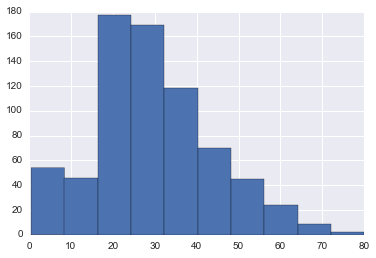

In [10]:
#number of female &  male 
print train_df.groupby(['Sex']).count()['PassengerId']
#number of people on ages *
train_df['Age'].hist()

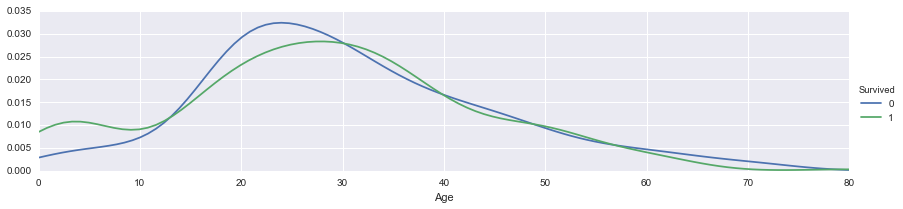

In [13]:
# plot for survived, not survived passengers by their age proportionally
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age')
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()

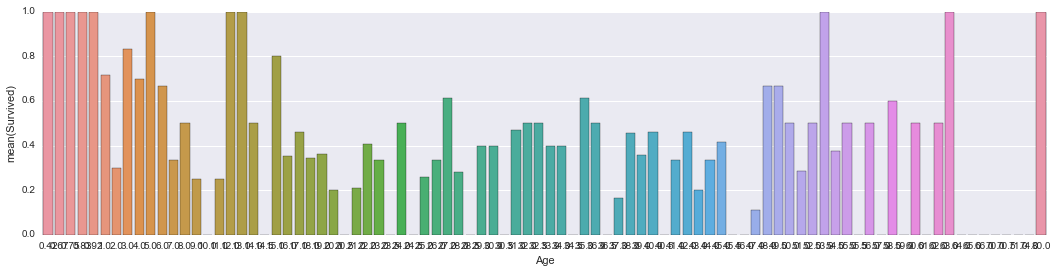

In [14]:
# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)


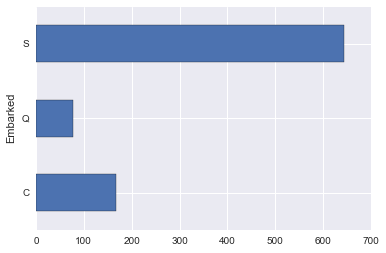

In [19]:
# how passengers embark the titanic
train_df.groupby('Embarked').count()['PassengerId'].plot(kind = 'barh')


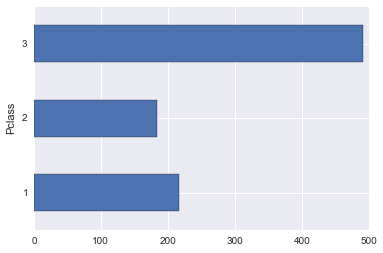

In [18]:
#numbers of passengers of every room class 
train_df.groupby('Pclass').count()['PassengerId'].plot(kind = 'barh')

(-1, 2)

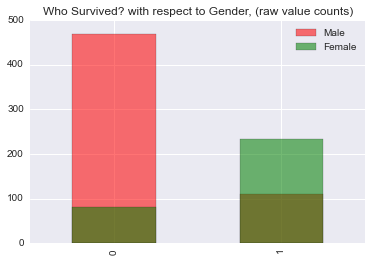

In [22]:

#"Who Survived? with respect to Gender, (raw value counts) "
train_df_male = train_df.Survived[train_df.Sex == 'male'].value_counts().sort_index()
train_df_female = train_df.Survived[train_df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
train_df_male.plot(kind='bar',label='Male', color='r', alpha=0.55)
train_df_female.plot(kind='bar', color='g',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2)

(-1, 2)

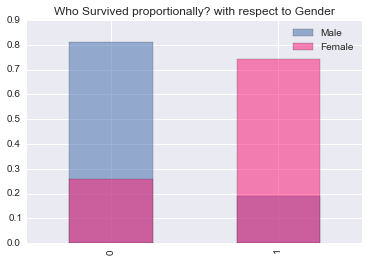

In [23]:
#"Who Survived proportionally? with respect to Gender"
ax2 = fig.add_subplot(122)
(train_df_male/float(train_df_male.sum())).plot(kind='bar',label='Male', alpha=0.55)  
(train_df_female/float(train_df_female.sum())).plot(kind='bar', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')
ax2.set_ylim(-1, 2)


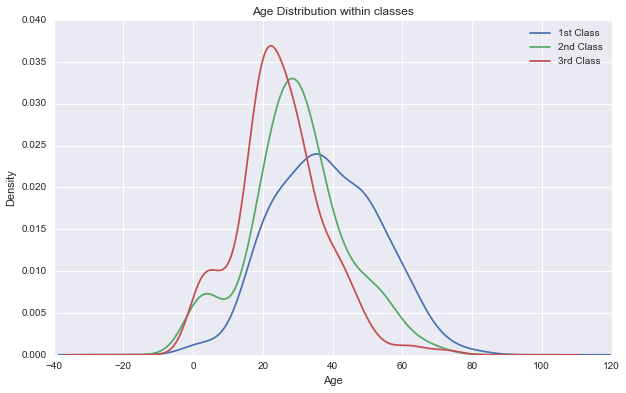

In [24]:
# plots a kernel density estimate of the subset of the 1st class passangers's age
fig = plt.figure(figsize=(10,6), dpi=1600)
train_df.Age[train_df.Pclass == 1].plot(kind='kde')    
train_df.Age[train_df.Pclass == 2].plot(kind='kde')
train_df.Age[train_df.Pclass == 3].plot(kind='kde')

plt.xlabel("Age")    
plt.title("Age Distribution within classes")

plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 